### <i>P1: Flow over NACA 0015</i>


In [77]:
import numpy
import math
import sympy
from scipy import integrate
from matplotlib import pyplot
%matplotlib inline

In [78]:
def JoukowskiTransform(zetamat, zetac, a):
    zmat = (zetamat+zetac) + a**2/(zetamat+zetac)
    return zmat

In [79]:
#Define grid:
ngrad = 100; ngtheta = 100

#Define airfoil parameters:
T = 0.15; H = 0.0; c = 1.0; a = c/4.

zeta_c = -4*a/(3*math.sqrt(3))*T + 1j*2*a*H
r_s = (0.25 +T/(3*math.sqrt(3)))


radius = numpy.linspace(r_s, 2.0*r_s, ngrad)
azimuth = numpy.linspace(-numpy.pi, numpy.pi, ngtheta)

r, theta = numpy.meshgrid(radius, azimuth)

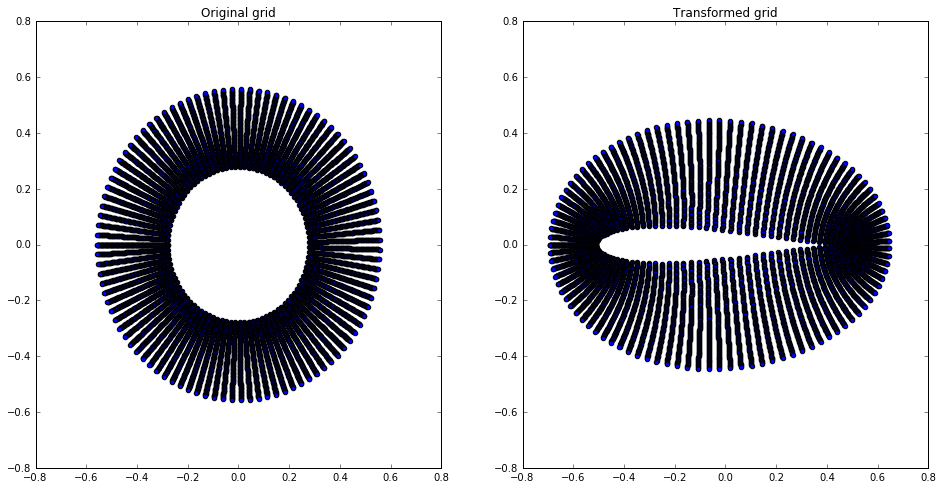

In [80]:
#Define complex mesh
zeta = r*numpy.exp(1j*theta)

#Create transformed grid
Z = JoukowskiTransform(zeta, zeta_c, a)

#Compare original and transformed grids:
pyplot.figure(figsize=(16,8))

pyplot.subplot(121)
pyplot.scatter(zeta.real, zeta.imag)
pyplot.title('Original grid')

pyplot.subplot(122)
pyplot.scatter(Z.real, Z.imag)
pyplot.xlim(-0.8,0.8)
pyplot.ylim(-0.8,0.8)
pyplot.title('Transformed grid')

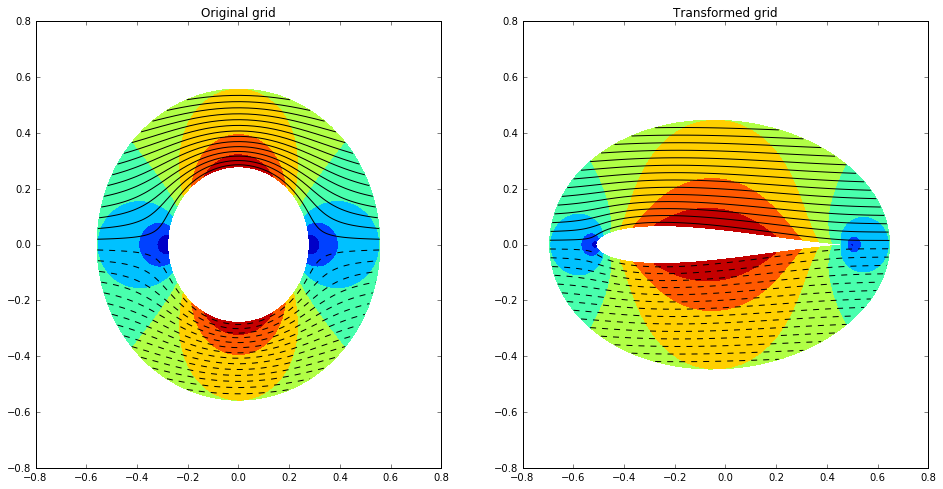

In [81]:
uinf = 1.0; a2 = r_s**2; alpha = 0.0

kappa = 2.0*math.pi*uinf*a2;
gamma = 4.0*math.pi*math.sqrt(a2)*uinf*numpy.sin(alpha+2*H)

W_vor = 1j*(gamma/2.0/math.pi)*numpy.log(zeta)
wvel_vor = 1j*(gamma/2.0/math.pi)/zeta

W_doublet = kappa/(2.0*math.pi*zeta)
wvel_doublet = -kappa/(2.0*math.pi*zeta**2)

W_FS = uinf*numpy.exp(-1j*alpha)*zeta
wvel_FS = uinf*numpy.exp(-1j*alpha)*numpy.ones_like(zeta)

W = W_FS + W_doublet + W_vor
wvel = wvel_FS + wvel_doublet + wvel_vor

#Compare original and transformed grids:
pyplot.figure(figsize=(16,8))

pyplot.subplot(121)
pyplot.contourf(zeta.real, zeta.imag, abs(wvel))
pyplot.contour(zeta.real, zeta.imag, W.imag, \
               levels=numpy.linspace(numpy.min(W.imag),numpy.max(W.imag),30), colors = '#000000')
pyplot.xlim(-0.8,0.8)
pyplot.ylim(-0.8,0.8)
pyplot.title('Original grid')

pyplot.subplot(122)
pyplot.contourf(Z.real, Z.imag, abs(wvel))
pyplot.contour(Z.real, Z.imag, W.imag, \
               levels=numpy.linspace(numpy.min(W.imag),numpy.max(W.imag),30),  colors = '#000000')
pyplot.xlim(-0.8,0.8)
pyplot.ylim(-0.8,0.8)
pyplot.title('Transformed grid')

In [102]:
#Define function to return appropriate sigma
def get_sigma(x_c, tk,u_inf):
    #Chord length assumed to be 1.0
    #Define function for yt and its derivative
    #xs = sympy.Symbol('xs')
    #yt = 5.0*tk*(0.2969*sympy.sqrt(xs) - 0.1260*xs - 0.3516*xs**2 \
                 #+ 0.2843*xs**3 - 0.1015*xs**4)
    #ytp = yt.diff(xs)
    ytp = 2.0*u_inf*5.0*tk*(0.2969*0.5/math.sqrt(x_c) - 0.1260 - 0.3516*2.0*x_c \
                 + 0.2843*3.*x_c**2 - 0.1015*4.*x_c**3)
    
    #Compute derivative for current position
    #f = sympy.lambdify(xs, ytp, 'numpy')
    #return (f(x_c))
    return ytp

In [107]:
#Using source-sink sheets
N = 100
xg = numpy.linspace(-1.0, 2.0, N); yg = numpy.linspace(-1.5, 1.5, N)
X, Y = numpy.meshgrid(xg, yg)
xsAF = 0.0; xeAF = c

uinf = numpy.ones_like(X); vinf = numpy.zeros_like(X)
u = numpy.copy(uinf); v = numpy.copy(vinf)
#print(get_sigma(xg[(xg >= -0.5) & (xg <= 0.5)] - xsAF, T))
    
u_sheet = numpy.empty((N, N), dtype=float)
v_sheet = numpy.empty((N, N), dtype=float)
#for ind in range(N):
    #if (xg[ind] >= xsAF and xg[ind] <= xeAF):
        #strength = get_sigma(xg[ind]-xsAF,T);
for i in range(N):
    for j in range(N):  
        integrand = lambda s : (get_sigma(s,T,uinf[i,j])*(X[i,j]-s))/\
        ((X[i,j]-s)**2+(Y[i,j])**2)
        u_sheet[i,j] = 1./(2*math.pi)*integrate.quad\
        (integrand, xcsAF, xceAF)[0]
        
        integrand = lambda s: (get_sigma(s,T,uinf[i,j])*(Y[i,j]))/\
        ((X[i,j]-s)**2+(Y[i,j])**2)
        v_sheet[i,j] = 1./(2*math.pi)*integrate.quad\
        (integrand, xcsAF, xceAF)[0]

/home/gil/anaconda3/lib/python3.4/site-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


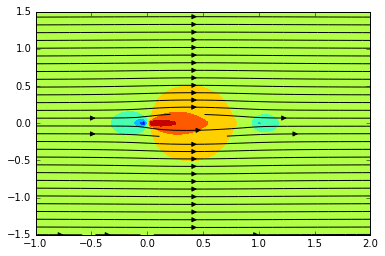

In [108]:
u += u_sheet; v+= v_sheet
pyplot.contourf(X,Y,numpy.sqrt(u**2+v**2))
pyplot.streamplot(X,Y,u,v,color='#000000');
pyplot.xlim(-1.0,2.0);
pyplot.ylim(-1.5,1.5);

<hr>

### <i>P2(a), (b): Flow over NACA 2412</i>

In [109]:
def get_theta(x_c):
    return numpy.arccos(1.0-2.0*x_c)

In [110]:
def get_deta_dx(m, p, c, x_c):
    if (x_c <= p*c):
        deta_dx = 2.0*m/p**2*(p-x_c)
    else:
        deta_dx = 2.0*m/(1.0-p**2)*(p-x_c)
    return deta_dx

In [166]:
#For NACA 2412:
m = 0.02; p = 0.4; c = 1.0
Ns = 10
x_c = numpy.linspace(0.1, 0.9, Ns);

#Other parameters

B_mat = numpy.zeros((Ns,Ns)); deta_mat = numpy.zeros(Ns)
B_sol = numpy.copy(deta_mat)

for i in range(Ns):
    theta = get_theta(x_c[i])
    
    deta_mat[i] = get_deta_dx(m, p, c, x_c[i])
    
    for j in range(Ns):
        B_mat[i,j] = math.cos(j*theta);
        

B_sol = numpy.linalg.solve(B_mat,deta_mat)
for i in range(Ns):
    detadx_m = 0.0
    for j in range(Ns):
        detadx_m += B_mat[i,j]*B_sol[j]
        
print('First five values of B_n:')
print(B_sol[:5])

First five values of B_n:
[ 0.04799258  0.08672235  0.07411564  0.02413942  0.0356283 ]


The values of the first five coefficients:

$B_{0} = 0.04799258$
<p>
$B_{1} = 0.08672235$<p>
$B_{2} = 0.07411564$<p>
$B_{3} = 0.02413942$<p>
$B_{4} = 0.0356283$<p>


In [140]:
def get_gamma(x_c, Uinf, Amat, Ns):
    ang = numpy.arccos(1.0-2.0*x_c)
    gamma = Amat[0]*(1.0 + numpy.cos(ang))/numpy.sin(ang)
    for ind in range (1,Ns):
        gamma += Amat[ind]*numpy.sin(ind*ang)
    gamma = gamma*2.0*Uinf
    return gamma

For alpha  0.0  integral  -0.0145499890377
For alpha  0.0872664625997  integral  0.257633691899


/home/gil/anaconda3/lib/python3.4/site-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


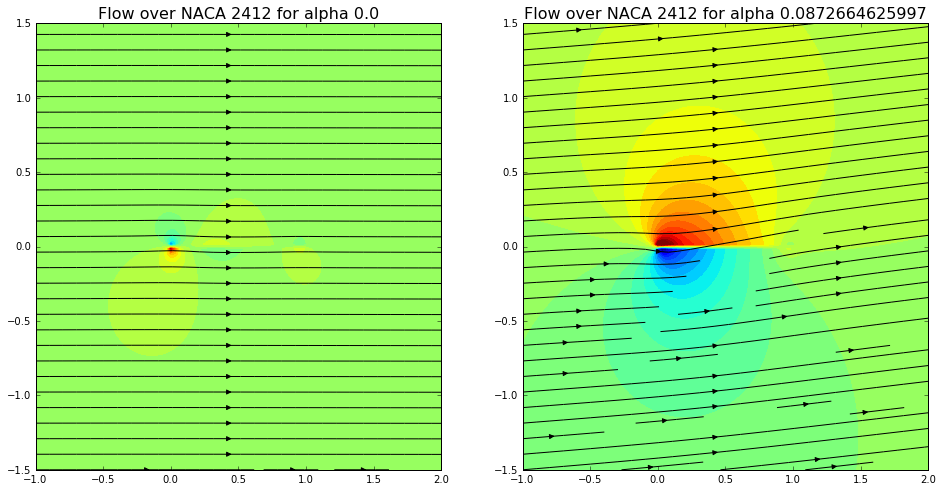

In [164]:
alpha = numpy.array([0, numpy.radians(5)])
Bn = numpy.copy(B_sol)
An = numpy.zeros_like(Bn)
An[1:] = Bn[1:]

fig, ax = pyplot.subplots(nrows=1, ncols=2)
fig.set_figheight(8); fig.set_figwidth(16)

for ialpha in range(2):
    uinf = numpy.ones_like(X)*numpy.cos(alpha[ialpha]);
    vinf = numpy.ones_like(X)*numpy.sin(alpha[ialpha]);
    u = numpy.copy(uinf); v = numpy.copy(vinf)
    An[0] = alpha[ialpha] - Bn[0]
    
    for i in range(N):
        for j in range(N):  
            integrand = lambda s : (get_gamma(s, uinf[i,j], An, Ns)*(Y[i,j]))/\
            ((X[i,j]-s)**2+(Y[i,j])**2)
            u_sheet[i,j] = 1./(2*math.pi)*integrate.quad\
            (integrand, xcsAF, xceAF)[0]

            integrand = lambda s: (get_gamma(s, uinf[i,j], An, Ns)*(X[i,j]-s))/\
            ((X[i,j]-s)**2+(Y[i,j])**2)
            v_sheet[i,j] = 1./(2*math.pi)*integrate.quad\
            (integrand, xcsAF, xceAF)[0]
            
    u += u_sheet; v+= v_sheet
    
    integrand = lambda s : (get_gamma(s, uinf[0,0], An, Ns))
    integral = 1.*uinf[0,0]*integrate.quad(integrand, xcsAF, xceAF)[0]
    
    print('For alpha ',alpha[ialpha], ' integral ', integral )

    string = 'Flow over NACA 2412 for alpha '
    string +=str(alpha[ialpha])
    #plot data
    ax[ialpha].contourf(X,Y,numpy.sqrt(u**2+v**2), \
                levels=(numpy.linspace(0.7, 1.25, 30)), extend='both')
    ax[ialpha].streamplot(X,Y,u,v,color='#000000');
    ax[ialpha].set_title(string, fontsize = 16)
    ax[ialpha].set_xlim(-1.0,2.0)
    ax[ialpha].set_ylim(-1.5,1.5)      

<hr>

### <i>P2(c): Lift on NACA 2412</i>

The Kutta-Joukowski lift integral for the two cases are as follows:<p>
For $\alpha = 0.0^{\circ}$, Lift = $-0.0145499890377$<p>
For $\alpha = 5.0^{\circ}$, Lift = $0.257633691899$